In [2]:
import numpy as np
import matplotlib.pyplot as plt
import detection_tools as dt
from IPython.display import display
from ipywidgets import interact, interaction, fixed, interact_manual, interactive
import ipywidgets as widgets
from glob import glob
import imageio
from skimage.exposure import equalize_hist

%matplotlib inline

## Error Level Analysis

In [3]:
filename = widgets.Dropdown(
    options=glob('allimages/*.[pj]??'),
    value='allimages/image_12.jpg',
    description='Archivo: ',
    disabled=False,
)


quality = widgets.IntSlider(
    value=85,
    min=0,
    max=100,
    step=1,
    description='Calidad:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# display(filename)
# display(quality)

def plot_ela(image_path, quality):
    fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(15,15))
    ela = equalize_hist(dt.ela_substract(image_path, quality))
    ori = imageio.imread(image_path)
    ax[0].imshow(ori)
    ax[1].imshow(ela)
    plt.show()

interactive_plot = interactive(plot_ela, image_path=filename, quality=quality)
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(Dropdown(description='Archivo: ', index=6, options=('allimages/image_01.jpg', 'allimages…

## Median filtering

In [4]:
filename = widgets.Dropdown(
    options=glob('allimages/*.[pj]??'),
    value='allimages/image_11.jpg',
    description='Archivo: ',
    disabled=False,
)
style = {'description_width': 'initial'}
window_size = widgets.IntSlider(
    value=7,
    min=3,
    max=21,
    step=2,
    description='Ancho de ventana:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)

def plot_median(image_path, window_size):
    fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(15,15))
    median = dt.median_filter_residuals(image_path, selem=np.ones((window_size, window_size)))
    ori = imageio.imread(image_path)
    ax[0].imshow(ori)
    ax[1].imshow(equalize_hist(median), cmap='gray')
    plt.show()
interactive_plot = interactive(plot_median, image_path=filename, window_size=window_size)
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(Dropdown(description='Archivo: ', index=10, options=('allimages/image_01.jpg', 'allimage…

## Wavelet Local Noise Levels

interactive(children=(Dropdown(description='Archivo: ', index=13, options=('allimages/image_01.jpg', 'allimage…

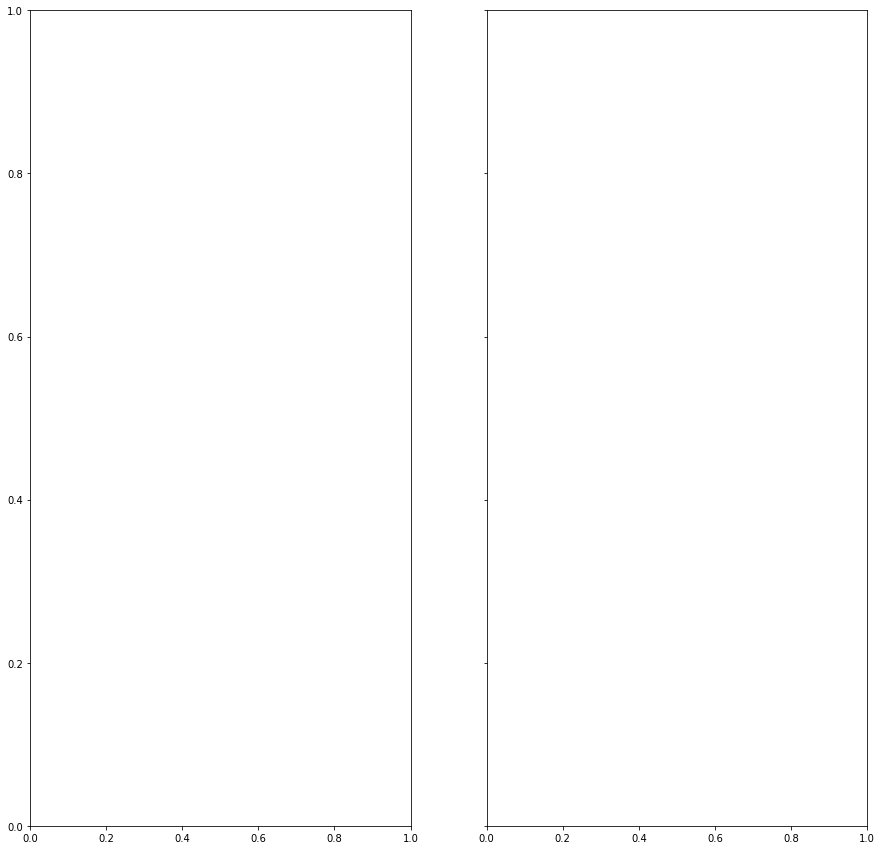

In [87]:
filename = widgets.Dropdown(
    options=glob('allimages/*.[pj]??'),
    value='allimages/image_11.jpg',
    description='Archivo: ',
    disabled=False,
)

logr = widgets.IntSlider(
    value=3,
    min=1,
    max=4,
    step=1,
    description='2^n, n: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

wavelet = widgets.Dropdown(
    options=['bior1.3', 'coif1', 'db1', 'dmey', 'haar', 'rbio1.1', 'sym2'],
    value='bior1.3',
    description='Wavelet: ',
    disabled=False,
)


def plot_wavelet(image_path, wave, n):
    fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(15,15))
    img = imageio.imread(image_path)
    transform = dt.noise_detection_wavelet(img, '', wave, 2 ** n)
    ori = imageio.imread(image_path)
    ax[0].imshow(ori)
    ax[1].imshow(transform, cmap='gray')
    plt.show()
interactive_plot = interactive(plot_wavelet, image_path=filename, wave=wavelet, n=logr)
output = interactive_plot.children[-1]
interactive_plot